In [1]:
#Ex1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('student_score.csv')
print(df.head())

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Xi'], df['Yi'])

predicted_grade = intercept + slope * 80

print("Predicted statistics grade: {:.2f}".format(predicted_grade))
print("Regression equation: y = {:.2f} + {:.2f}x".format(intercept, slope))

   Student  Xi  Yi
0        1  95  85
1        2  85  95
2        3  80  70
3        4  70  65
4        5  60  70
Predicted statistics grade: 78.29
Regression equation: y = 26.78 + 0.64x


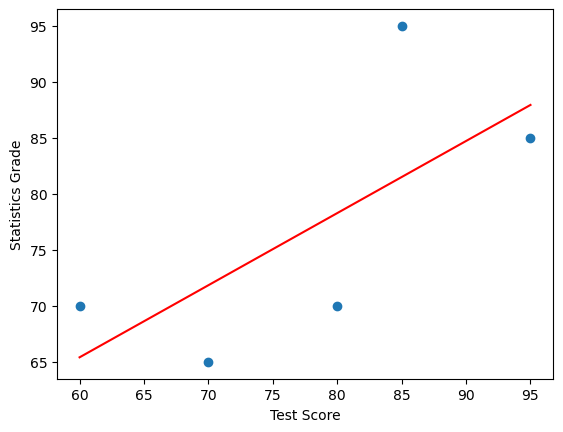

R-squared: 0.48


In [2]:
#Ex2andEx3
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


df = pd.DataFrame({'test_score': [95, 85, 80, 70, 60],
                   'statistics_grade': [85, 95, 70, 65, 70]})


slope, intercept, r_value, p_value, std_err = stats.linregress(df['test_score'], df['statistics_grade'])


r_squared = r_value**2


plt.scatter(df['test_score'], df['statistics_grade'])
plt.plot(df['test_score'], intercept + slope * df['test_score'], 'r')
plt.xlabel('Test Score')
plt.ylabel('Statistics Grade')
plt.show()


print("R-squared: {:.2f}".format(r_squared))

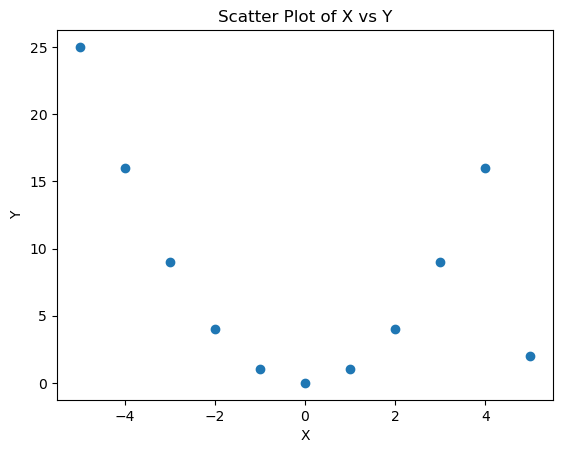

In [4]:
#Ex4
from matplotlib import pyplot as plt
import numpy as np
 
X = np.array([-4,-2,1,3,-1,-5,4,2,0,-3,5])
Y = np.array([16,4,1,9,1,25,16,4,0,9,2])
 
plt.figure()
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of X vs Y")
plt.show()

#3.2
#the data seems to have a non-linear relationship, so a non-linear regression model such as 
#quadratic polynomial regression would make sense.

In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Load the data from the csv file
data = pd.read_csv("disease.csv")
print(data.head())
print(data.columns)

    age  sex   cp  tresbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0    145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0    160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0    120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0    130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0    130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  result  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
Index(['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result'],
      dtype='object')


In [6]:
#clean up data
missing_values = data.isnull().sum()
print(missing_values)

age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
result     0
dtype: int64


<AxesSubplot:>

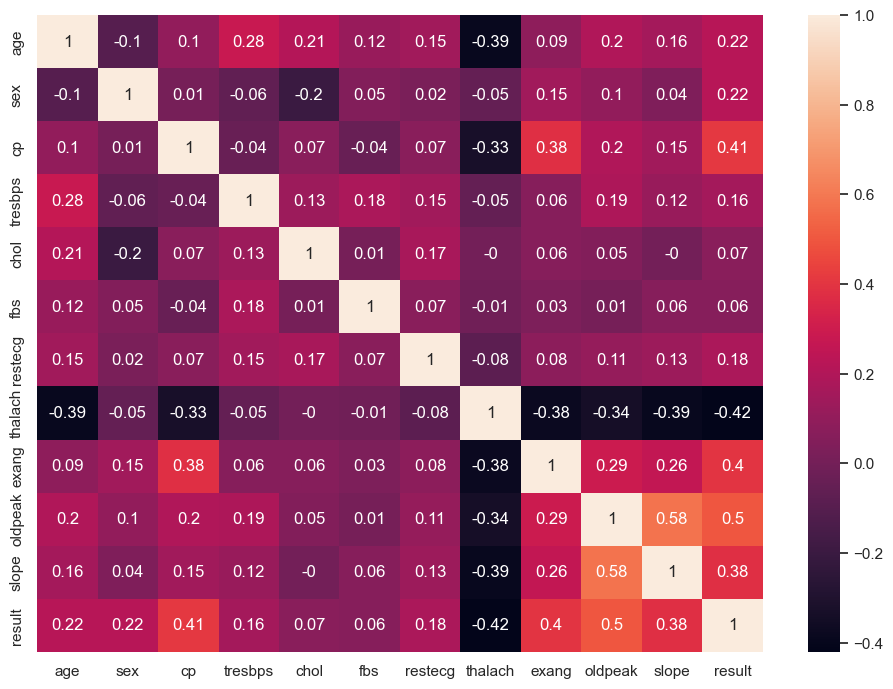

In [7]:
#visualize heat map for variables 
correlation_matrix = data.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
#select independent and dependent variables
X = data['cp']
y = data['result']

#normalize X and y between -1, 1
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [9]:
#build simple linear regression model, split 80% for training and 20% for validation 
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)
#take linear regression
lr = linear_model.LinearRegression()
#fit the data
lr.fit(X_train_1, Y_train_1)

LinearRegression()

In [10]:
#measure the model and performance for test data 
y_pred_1 = lr.predict(X_test_1)
mse = mean_squared_error(Y_test_1, y_pred_1)
r = round(lr.score(X_test_1, Y_test_1), 2)

print("The model performance")
print("---------------------")
print('MSE is {}'.format(mse))
print('R-squared score is {}'.format(r))

The model performance
---------------------
MSE is 1.0241272155215082
R-squared score is 0.17


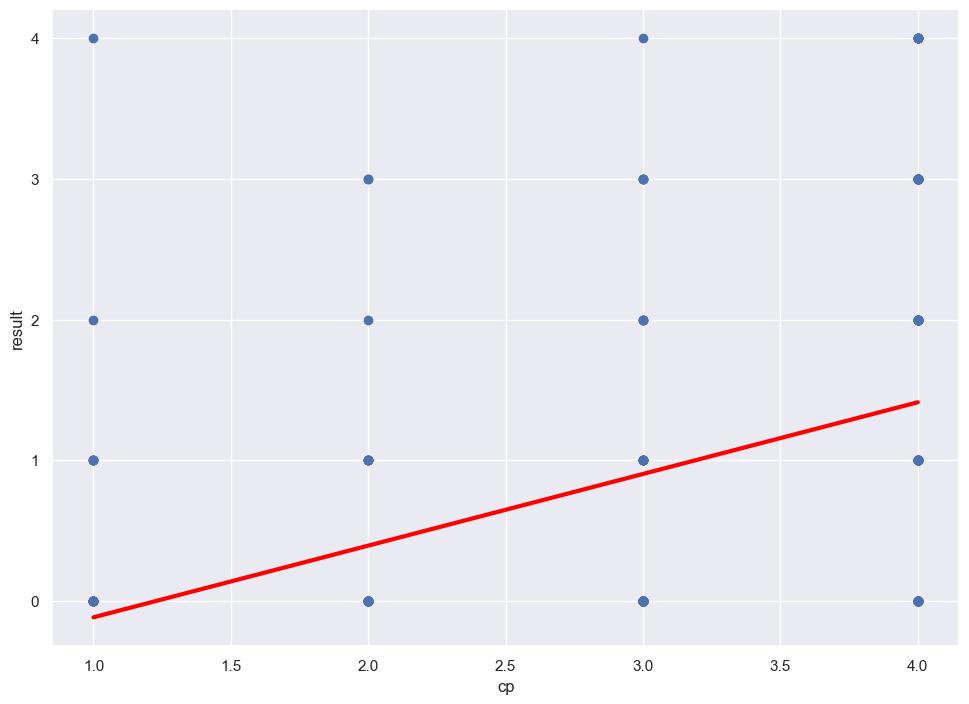

In [11]:
#plot the regression graph
prediction_space = np.linspace(min(X), max(y)).reshape(-1, 1)
plt.scatter(X, y)
plt.plot(prediction_space, lr.predict(prediction_space), color = 'red', linewidth = 3)
plt.ylabel('result')
plt.xlabel('cp')
plt.show()

In [12]:
# Load the data from the CSV file
data2 = pd.read_csv('disease.csv', na_values='?')

# Remove rows with missing data
data2.dropna(inplace=True)

#logical regression

I = data2.drop('result', axis=1)
j = data2['result']

#build the regression model 
I_train_1, I_test_1, J_train_1, J_test_1 = train_test_split(I, j, test_size = 0.2, random_state=5)

#take non-linear regression
lr = linear_model.LogisticRegression(max_iter=10000)
#fit the data
lr.fit(I_train_1, J_train_1)

j_pred_1 = lr.predict(I_test_1)

mse2 = mean_squared_error(J_test_1, j_pred_1)
r2 = round(lr.score(I_test_1, J_test_1), 2)

print("The model performance")
print("---------------------")
print('MSE is {}'.format(mse2))
print('R-squared score is {}'.format(r2))

The model performance
---------------------
MSE is 0.95
R-squared score is 0.68
